

# Project: Movies data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project we will analyze data that related to around 10k movies in order to figure out the most profit movies and the effect of high budget on revenue. 
    

In [1]:
#First we have to import some important packages that will help us during the analyzing process and enhance our project.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
#Uploading the data
df_movies = pd.read_csv('tmdb-movies.csv')

In [3]:
# short look on the data to understand the nature of the data.
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


**That obvious there is some useless columns we might drop it.**

In [4]:
# identifing the number of rows/columns.
df_movies.shape

(10866, 21)

**So we have 21 columns and 10866 rows.**


In [5]:
# take a look of the type of columns and decide which columns are not needed in our project.
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

**It seems that there are some columns we will not use.**

In [6]:
# Study the statical behaviour of the data./
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**Take a statical look over the data to make  first impreesion.**



### Data Cleaning 
**At this stage we will filter some columns that we dont need anymore  and make the table more appropriate with our questions.**        
**then we will deal with the missing values.**

In [7]:
#Droping certain columns that we no longer need in our project.
df_movies.drop(['id' , 'imdb_id'  , 'homepage' , 'director' , 'tagline' , 'keywords' , 'overview' , 'production_companies' , 'release_date' , 'genres'] , axis =1 , inplace = True)



**I kept some columns like the Rating of the movie and the cast while its not needed just for the reader`s curiosity.** 

In [8]:
#Checking the columns after dropping process
df_movies.head(2)

,popularity,budget,revenue,original_title,cast,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,6185,7.1,2015,1.379999e+08,3.481613e+08


**Adter dropping process the table look more tidy and more suitable for our analysis.**

In [9]:
#Checking the missing values (null)
df_movies.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
cast              76
runtime            0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

**the null values of both columns are string so, we cant fill them using the mean.**


**we can drop it since it`s just 76 rows and dont have that significant effect.** 

**or we can replace the null values by '-'**

**"-" = means the cast name or genres are missing**

In [10]:
#Replacing the null values by '-'.
df_movies.fillna('-' , inplace=True) 

In [11]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10866 non-null object
runtime           10866 non-null int64
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(5), object(2)
memory usage: 933.9+ KB


**All the messing values are filled.**

<a id='eda'></a>
## Exploratory Data Analysis



### Q1) What are the Top 5 Movies made highest Profits?


In [12]:
# First we have to create new column contain the profit.
#We will use the adjusted revenues and budget because it seems more fear and to consider the inflation.

df_movies['profit_adj'] = df_movies['revenue_adj'] - df_movies['budget_adj']
df_movies.head()

,popularity,budget,revenue,original_title,cast,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


**Now the new column is ready to extraction process.**

In [13]:
#Extract the top 5 high profit movies. 
df_top5 = df_movies.nlargest(5,'profit_adj')
df_top5[['profit_adj' , 'original_title']].head()

,profit_adj,original_title
1329,2.750137e+09,Star Wars
1386,2.586237e+09,Avatar
5231,2.234714e+09,Titanic
10594,2.128036e+09,The Exorcist
9806,1.878643e+09,Jaws


**Top 5 list is presented.**

Text(0.5,1,'Top 5 high profit movies')

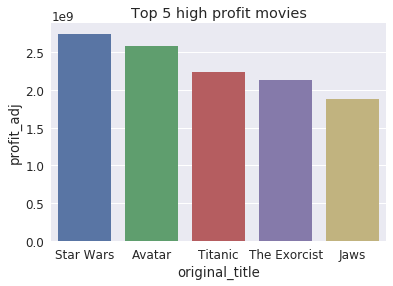

In [14]:
# visulizing the Top 5 list by Bar plot.
sns.set(style="dark");
sns.set(font_scale=1.2);
sns.barplot(x='original_title', y='profit_adj', data=df_top5 );
plt.title('Top 5 high profit movies')

**As shown above Star Wars have the most profit over the history (Considering inflation).**

### Q2) Does the high Budget increase the revenues of the movie?

Text(0.5,1,'Distribution of the adjusted revenue')

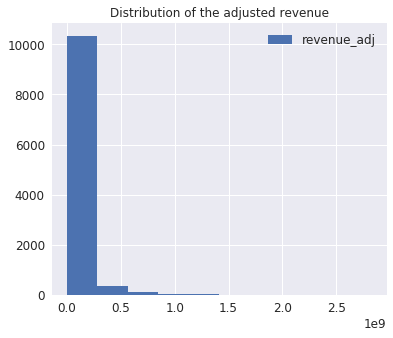

In [15]:
#Checking the distribution of the revenue by plotting histogram
df_movies['revenue_adj'].hist(figsize = (6  , 5), label = 'revenue_adj' )
plt.legend()

plt.title('Distribution of the adjusted revenue', fontsize=12.1)


Text(0.5,1,'Distribution of the adjusted budget')

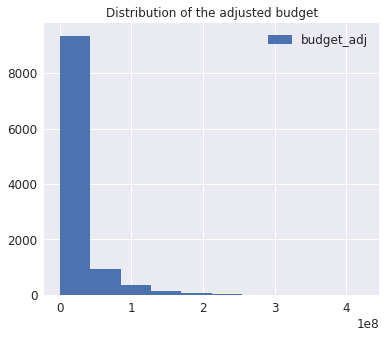

In [16]:
#Checking the distribution of the budget by plotting histogram
df_movies['budget_adj'].hist(figsize = (6  , 5), label = 'budget_adj' )
plt.legend()
plt.title('Distribution of the adjusted budget', fontsize=12.1)

**both columns skewed to the right.**

Text(0.5,1,'Relationship between Budget and Revenues')

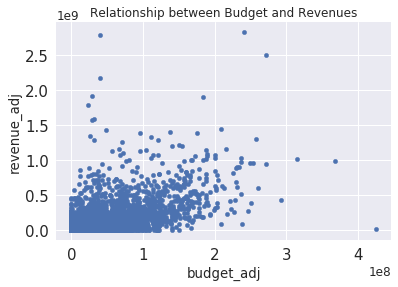

In [17]:
#We can find the relationship between them by plotting scatter plot.
#We will use the adjusted revenues and budget because it seems more fear.
df_movies.plot( y ='revenue_adj', x ='budget_adj', kind='scatter' , fontsize = 15)

plt.title('Relationship between Budget and Revenues', fontsize=12.1)


In [18]:
#Obtaining the correlation value of Budegt and revenues.
df_movies['revenue_adj'].corr(df_movies['budget_adj'])

0.64660744106089629

**From the scatter plot and the correlation value we can cunclude that the Budget has positive correlation with the revenues.**

**0.65 considered to be moderate correlation.**


In [19]:
#Finding the budgets of highest revenue movies to determine is it high or not.
def function1(arg):
    return df_movies[arg].mean()

def function2(arg1 , arg2 ):
    return df_movies[df_movies[arg1] >= arg2]

def function3(arg1 , arg2 ):
    return high_revenue_adj[df_movies[arg1] >= arg2]

mean_budget_adj = function1('budget_adj')
mean_revenue_adj = function1('revenue_adj')
high_revenue_adj = function2('revenue_adj', mean_revenue_adj)
high_budget_adj = function2('budget_adj', mean_budget_adj )

high_revenue_adj_with_high_budget_adj =  function3( 'budget_adj' , mean_budget_adj)
percent = high_revenue_adj_with_high_budget_adj['revenue'].count()/ high_revenue_adj['revenue_adj'].count()*100
percent

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


79.831932773109244

**The forumlas above shows that 79.8% of the high revenue movies have a high budget.**

**We used call fuction to save memory and avoid repititive code.**

<a id='conclusions'></a>
## Conclusions 

**This was very intersting analysis. We figured out certain facts related to the successful movies , for example almost 80% of the high revenue movies were start with high budget. That clearly shows the positive relationship between the budget and the revenue. Beside that we created profit column which help us increadibly on finding the most 5 successfull movies over the history!! (considering inflation).
Replacing the null values by '-' symbol was very helpful to conserve the rest values of the row and to make the result more precise.** 


**Limitations: This analysis was good to make simple imperssion but for more accurate conclusion there is some points on the data we recommand to fix:**

**1- the zeros rows on the budget and the revenues could signifcantly impact the accuarcy of the analysis.**

**2- there were a tremendous number of null values in some columns like homepage , it could be burden for the analyst who intersted on this column.** 

**3- some useful columns could be provided for certain purposes like  the number of trophies were achieved and the wages of the cast.**




In [21]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0